In [50]:
import pandas as pd
import sklearn as sk
import matplotlib as mp
import numpy as np


In [2]:
weather = pd.read_csv('D:\VS Code Projects\Machine Learning\local_weather.csv', index_col='DATE')
weather

<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\Joseph\AppData\Local\Temp\ipykernel_21632\4249076230.py:1: SyntaxWarning: invalid escape sequence '\V'
  weather = pd.read_csv('D:\VS Code Projects\Machine Learning\local_weather.csv', index_col='DATE')


,STATION,NAME,ACMH,ACSH,AWND,FMTM,FRGB,FRGT,FRTH,GAHT,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00014826,"FLINT FCWOS, MI US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00014826,"FLINT FCWOS, MI US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-03,USW00014826,"FLINT FCWOS, MI US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1960-01-04,USW00014826,"FLINT FCWOS, MI US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1960-01-05,USW00014826,"FLINT FCWOS, MI US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-25,USW00014826,"FLINT FCWOS, MI US",NaN,NaN,4.03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-26,USW00014826,"FLINT FCWOS, MI US",NaN,NaN,2.91,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-27,USW00014826,"FLINT FCWOS, MI US",NaN,NaN,3.80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather.apply(pd.isnull).sum()/weather.shape[0]
# weather.apply(pd.isnull) will yield true/false values to tell which columns have missing values
# .sum() this will give a count of all null values.
# /weather.shape[0] divides the sum by the number of rows to give what percentage of the missing values of the columns.

STATION    0.000000
NAME       0.000000
ACMH       0.529105
ACSH       0.529063
AWND       0.371730
FMTM       0.569890
FRGB       0.999958
FRGT       0.999958
FRTH       0.999958
GAHT       0.999958
PGTM       0.476195
PRCP       0.000042
SNOW       0.000763
SNWD       0.000127
TAVG       0.711494
TMAX       0.000042
TMIN       0.000042
TSUN       0.996100
WDF1       0.529190
WDF2       0.548522
WDF5       0.550981
WDFG       0.693178
WESD       0.681519
WSF1       0.529232
WSF2       0.548522
WSF5       0.550981
WSFG       0.693178
WT01       0.543732
WT02       0.954127
WT03       0.912537
WT04       0.986688
WT05       0.984059
WT06       0.975580
WT07       0.994404
WT08       0.747530
WT09       0.986221
WT10       0.999788
WT11       0.997032
WT13       0.870776
WT14       0.957010
WT15       0.994573
WT16       0.665070
WT17       0.994404
WT18       0.810955
WT19       0.997371
WT21       0.977700
WT22       0.994488
WV03       0.998474
dtype: float64

At this point we need to look at documentation that came with the dataset we just downloaded. table 4 says that there are 5 core values so for the purposes of this project, the core values are the only values to be used.

In [4]:
core_weather = weather[['PRCP','SNOW','SNWD','TMAX','TMIN']].copy()
# here we are taking the 5 core columns from our data set and copying them into a new dataframe.

In [5]:
core_weather.columns = ['precip','snow','snow_depth','temp_max','temp_min']
# here we are renaming the columns just because i dont like working in caps.

In [6]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.00,0.0,1.0,32.0,13.0
1960-01-02,0.01,0.0,1.0,38.0,18.0
1960-01-03,0.02,0.2,0.0,33.0,26.0
1960-01-04,0.03,0.3,0.0,26.0,14.0
1960-01-05,0.01,0.1,0.0,21.0,8.0
...,...,...,...,...,...
2024-07-25,0.00,0.0,0.0,79.0,58.0
2024-07-26,0.00,0.0,0.0,80.0,55.0
2024-07-27,0.00,0.0,0.0,82.0,53.0


now we need to check the smaller data set containing our 5 core weather columns we just created for null values

In [7]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]
# we can use the same line of code from block 1. just change weather to core_weather to work with our new data frame.

precip        0.000042
snow          0.000763
snow_depth    0.000127
temp_max      0.000042
temp_min      0.000042
dtype: float64

As we can see, every category has a few null values. we need to replace those and there are 2 ways we can go about it: 
    1) we can make the null values = 0.
    2) we can use a forward fill which will us the last value as the present value.
we will use both methods.

In [8]:
core_weather['snow'].value_counts()

snow
0.0     20571
0.1       444
0.2       378
0.3       256
0.4       230
        ...  
9.3         1
6.4         1
8.6         1
6.7         1
11.0        1
Name: count, Length: 96, dtype: int64

In [9]:
core_weather['snow'] = core_weather['snow'].fillna(0)

In [10]:
core_weather['snow'].value_counts()

snow
0.0     20589
0.1       444
0.2       378
0.3       256
0.4       230
        ...  
9.3         1
6.4         1
8.6         1
6.7         1
11.0        1
Name: count, Length: 96, dtype: int64

In [11]:
core_weather['precip'].value_counts()

precip
0.00    14770
0.01     1041
0.02      808
0.03      543
0.04      421
        ...  
2.57        1
1.92        1
1.60        1
2.00        1
3.27        1
Name: count, Length: 221, dtype: int64

In [12]:
core_weather['precip'] = core_weather['precip'].fillna(0)

In [13]:
core_weather = core_weather.fillna(method='ffill')

C:\Users\Joseph\AppData\Local\Temp\ipykernel_21632\1266411444.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method='ffill')


In [14]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.0
snow          0.0
snow_depth    0.0
temp_max      0.0
temp_min      0.0
dtype: float64

Now that we have gotten rid of all null values, the next step is to make sure that numerical values are the only data type used.

In [15]:
core_weather.dtypes
# here we check the data type of core_weather. they are all floats so this is good.

precip        float64
snow          float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

Now lets take a look at our index to make sure that its the right data type.

In [16]:
core_weather.index
# the data type is an object. 

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-07-20', '2024-07-21', '2024-07-22', '2024-07-23', '2024-07-24',
       '2024-07-25', '2024-07-26', '2024-07-27', '2024-07-28', '2024-07-29'],
      dtype='object', name='DATE', length=23587)

Since the dtype is an object which is a strings, we want to convert this into something we can use. 

In [17]:
core_weather.index = pd.to_datetime(core_weather.index)
# here we use the pandas datetime function to convert our index into a datetime.

In [18]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2024-07-20', '2024-07-21', '2024-07-22', '2024-07-23',
               '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-27',
               '2024-07-28', '2024-07-29'],
              dtype='datetime64[ns]', name='DATE', length=23587, freq=None)

Now we need to reference the documentation that came with our data set. in the table 4 section, it states: 9’s in a field (e.g.9999) indicate missing data or data that has not been received. we need to make sure that this doesnt exist in our data.

In [19]:
core_weather.apply(lambda x: (x==9999).sum())
# here we use an lamda function to check if there are any values in our data that equal 9999. fortuinately, there are not so we can move onto the next step.

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

<Axes: xlabel='DATE'>

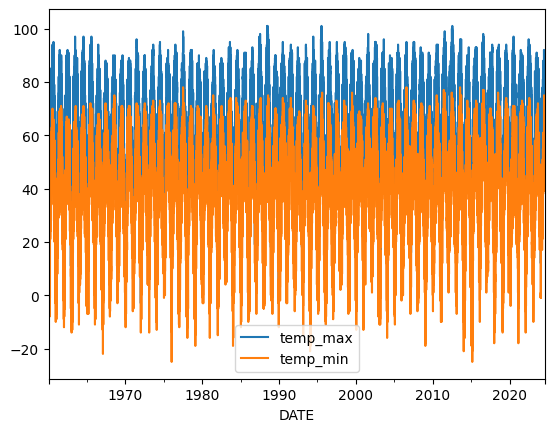

In [52]:
core_weather[['temp_max','temp_min']].plot()


<Axes: xlabel='DATE'>

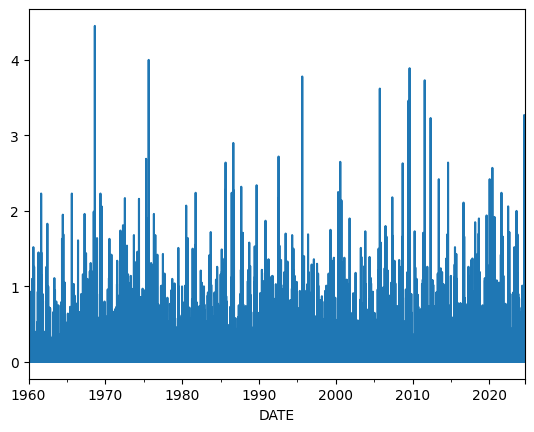

In [21]:
core_weather['precip'].plot()

In [22]:
core_weather['precip'].groupby(core_weather.index.year).sum()

DATE
1960    22.43
1961    30.54
1962    23.29
1963    18.08
1964    24.59
        ...  
2020    33.89
2021    37.65
2022    23.44
2023    34.66
2024    20.94
Name: precip, Length: 65, dtype: float64

# **Machine Learning**

The first thing that we need to do is decide what we want to predict. lets try to predict tomorrows max temperature.

In [23]:
core_weather['target'] = core_weather.shift(-1)['temp_max']
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1960-01-01,0.00,0.0,1.0,32.0,13.0,38.0
1960-01-02,0.01,0.0,1.0,38.0,18.0,33.0
1960-01-03,0.02,0.2,0.0,33.0,26.0,26.0
1960-01-04,0.03,0.3,0.0,26.0,14.0,21.0
1960-01-05,0.01,0.1,0.0,21.0,8.0,30.0
...,...,...,...,...,...,...
2024-07-25,0.00,0.0,0.0,79.0,58.0,80.0
2024-07-26,0.00,0.0,0.0,80.0,55.0,82.0
2024-07-27,0.00,0.0,0.0,82.0,53.0,87.0


notice the NaN in the bottom right corner of the data. this is because we dont have the data yet so we are just going to get rid of that row.

In [24]:
core_weather = core_weather.iloc[:-1,:].copy()

In [25]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1960-01-01,0.00,0.0,1.0,32.0,13.0,38.0
1960-01-02,0.01,0.0,1.0,38.0,18.0,33.0
1960-01-03,0.02,0.2,0.0,33.0,26.0,26.0
1960-01-04,0.03,0.3,0.0,26.0,14.0,21.0
1960-01-05,0.01,0.1,0.0,21.0,8.0,30.0
...,...,...,...,...,...,...
2024-07-24,0.01,0.0,0.0,77.0,63.0,79.0
2024-07-25,0.00,0.0,0.0,79.0,58.0,80.0
2024-07-26,0.00,0.0,0.0,80.0,55.0,82.0


Now its time to do some machine learning.

In [26]:
from sklearn.linear_model import Ridge
# Here we imported the Ridge regression model from sklearn.

reg = Ridge(alpha=.1)
# Here we inicialize the model in a new variable we created called reg.

In [27]:
predictors = ['precip','snow','snow_depth','temp_max','temp_min']

In [28]:
train = core_weather.loc[:'2022-12-31']

In [29]:
test = core_weather.loc['2023-01-01':]

In [30]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [31]:
predictions = reg.predict(test[predictors])

In [32]:
from sklearn.metrics import mean_absolute_error

In [59]:
error = mean_absolute_error(test['target'], predictions)

this means that on average, we are about 5.9 degrees off.

In [34]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
# here we combine our actuals with our predictions. we do this in machine learning because we like to see the actual values and the predicted values side by side
# here we are going to concatinate the actuals ([test['target'],) with the predictions.
# since the predictions are currently a numpy array, we need to convert it to a pandas series with the same index as our test data.
# we concat on axis 1 because we want each series to be a column.

combined.columns = ['actual','predictions']

In [35]:
combined

,actual,predictions
DATE,,
2023-01-01,44.0,45.671655
2023-01-02,42.0,46.089756
2023-01-03,52.0,44.112762
2023-01-04,39.0,52.839106
2023-01-05,37.0,41.484583
...,...,...
2024-07-24,79.0,76.792908
2024-07-25,80.0,78.076015
2024-07-26,82.0,78.652442


<Axes: xlabel='DATE'>

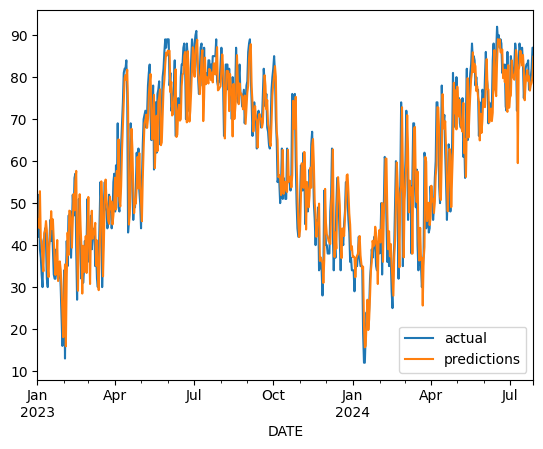

In [36]:
combined.plot()

In [37]:
reg.coef_

array([-3.9398021 , -1.23806597, -0.05637872,  0.84899567,  0.09085643])

above says that precipitation, snow, and snow_depth all have a negative impact on temperature which makes sense.

In [57]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:'2022-12-31']
    test = core_weather.loc['2023-01-01':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual','predictions']
    return error, combined
# here we create a function that takes our list of predictors, the core_weather, and the regression model, and in this function we split the training and the test set,
# we fit our regression model, and generate predictions. we then generate our error, combine our data frame, and return the error and combined data frame.
# now we can run this function instead of having to copy paste all this code.

lets create some more predictors.

In [39]:
core_weather['month_max'] = core_weather['temp_max'].rolling(30).mean()
# here we look at the average temperature this month. we can do that by using a rolling mean. what this does is look back 30 days from each day and find the average
# of a certain column durring that period.
# This says for the temp_max column, over the 30 days before every row, find the rolling mean and assign it to the month_max variable.

In [40]:
core_weather = core_weather.iloc[30:,:].copy()

In [41]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target,month_max
DATE,,,,,,,
1960-01-31,0.00,0.0,5.0,34.0,25.0,34.0,31.700000
1960-02-01,0.00,0.0,3.0,34.0,13.0,23.0,31.566667
1960-02-02,0.00,0.1,3.0,23.0,11.0,30.0,31.233333
1960-02-03,0.00,0.0,3.0,30.0,8.0,36.0,31.366667
1960-02-04,0.00,0.0,3.0,36.0,10.0,41.0,31.866667
...,...,...,...,...,...,...,...
2024-07-24,0.01,0.0,0.0,77.0,63.0,79.0,81.366667
2024-07-25,0.00,0.0,0.0,79.0,58.0,80.0,81.300000
2024-07-26,0.00,0.0,0.0,80.0,55.0,82.0,81.200000


In [42]:
core_weather['month_day_max'] = core_weather['month_max'] / core_weather['temp_max']
# here we say: on this given day, was the temperature different from the monthly mean or not? to do this we divide the monthly mean temperature by the temperature of that day.

In [43]:
core_weather['max_min'] = core_weather['temp_max'] / core_weather['temp_min']
# here we look at the ratio between the max and min temperatures by dividing the max by the min.

In [44]:
predictors = ['precip','snow','snow_depth','temp_max','temp_min','month_max','month_day_max','max_min']

In [63]:
error, combined = create_predictions(predictors, core_weather, reg)

ValueError: Input X contains infinity or a value too large for dtype('float64').